# Modelo Regressão Linear

## Os dados

### Importando os dados

In [195]:
import pandas as pd

In [196]:
dados = pd.read_excel('/content/drive/MyDrive/Regressao_Linear/BaseDados_RegressaoLinear.xlsx')

### Visualizando os dados

In [197]:
dados.head()

,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000


In [198]:
dados.info() #informações da tabela importada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            99 non-null     float64
 1   Limite_Emprestimo  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [199]:
dados.describe() #Informacoes estatisticas da tabela

,Salario,Limite_Emprestimo
count,99.000000,99.000000
mean,2119.100581,4900.652060
std,600.832983,1378.113961
min,1250.219130,2900.124323
25%,1595.383780,3700.800280
50%,2035.792243,4722.412623
75%,2597.840528,6026.191986
max,3314.978916,7423.384910


### Separando os dados

In [200]:
x = dados[['Salario']] #As variaveis

In [201]:
y = dados['Limite_Emprestimo'] #O "Target".

In [202]:
x.shape

(99, 1)

In [203]:
y.shape

(99,)

**Separação dos dados de treino e teste**

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
x_treino, x_teste, y_treino,y_teste = train_test_split(x,y, test_size=0.20) #Separando os dados de treino e de teste. X e Y, cada um irao ser divididos desta forma. Sendo 30% para teste e 70% para treino

In [206]:
print(len(x_treino),len(x_teste))

79 20


### Relação entre o eixo x com y

**Visualizando com seaborn**

In [207]:
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


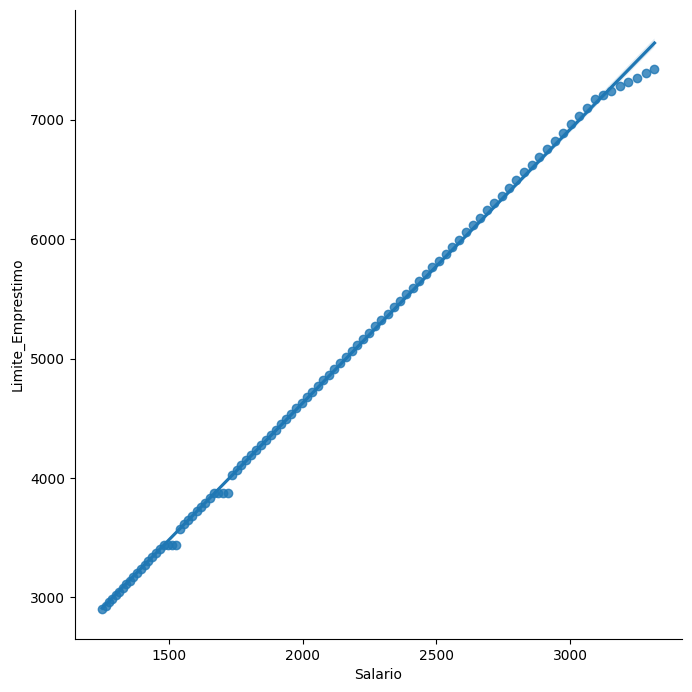

In [208]:
sns.pairplot(dados, x_vars=['Salario'], y_vars=['Limite_Emprestimo'], size=7, kind='reg')

*O uso do grafico acima é para verificar a linha de regressao (releção entre o eixe x e o eixo y). Quanto menos a linha for horizontal, sendo mais inclinada, maior a relação.*

**Usando o numpy as np**

In [209]:
import numpy as np

In [210]:
x_var = dados['Salario'].values

In [211]:
y_var = dados['Limite_Emprestimo'].values

In [212]:
correlação = np.corrcoef(x_var.T,y_var)

In [213]:
correlação

array([[1.        , 0.99949773],
       [0.99949773, 1.        ]])

*A função "[corrcoef](https://numpy.org/doc/2.0/reference/generated/numpy.corrcoef.html)" funcionara para verificar se a relação entre a varivel e o resultado alvo é forte ou fraca. Abaixo um grafico que mostra como funciona o nivel de relação que vai de -1 a 1. Quanto mais proximo de 1 mais forte é a relação*

*No caso, a relação da variavel com o resultado alvo é de 0.99%*

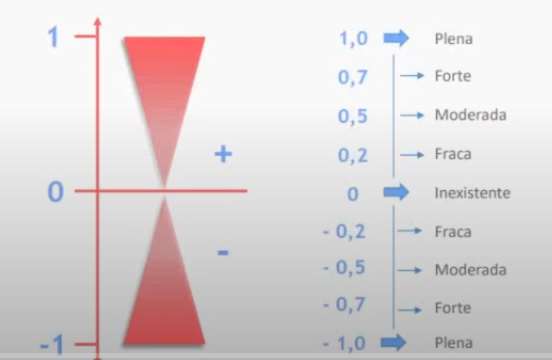

## Importação do Modelo

In [214]:
from sklearn.linear_model import LinearRegression

In [215]:
reglin = LinearRegression()

## Treinando o Modelo

In [216]:
reglin.fit(x_treino,y_treino) #Passando os dados que foram separados para a maquina ser treinada.

LinearRegression()

## Previsao

In [217]:
previsao = reglin.predict(x_teste)
previsao

array([5623.1281873 , 4754.95165695, 3574.21355134, 7415.52487912,
       2937.23821214, 4481.95243387, 3609.51174034, 3084.8023071 ,
       4351.44451592, 5094.74934516, 7198.74102952, 3904.90559751,
       5849.64713958, 6988.33276087, 5792.16939218, 6851.50974743,
       3145.91450098, 5513.20509734, 4802.057227  , 6145.77335985])

## Avaliacao da performance

In [218]:
from sklearn import metrics

**MAE**

In [219]:
metrics.mean_absolute_error(y_teste,previsao)

22.78326973384219

**RMSE**

In [220]:
np.sqrt(metrics.mean_squared_error(y_teste,previsao))

31.423389583773105

*O tipo de avaliação MAE e RMSE são os mais comuns e usados. MAE lhe dar a media de erros entre o que foi previsto pela a maquina e o resultado no y_teste. O RMSE ele tem o mesmo conceito so que elevando a raiz quadrada, assim dando mais peso*